In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
data = pd.read_csv('spambase-data.csv',header=None)
y = np.array(data[57])
data = data.drop(labels=57,axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [3]:
# Part 1
print("# not spam: "+str(len(list(y[y==0]))))
print("# spam: "+str(len(list(y[y==1]))))
print("# total: "+str(len(y)))
print("# features: "+str(data.shape[1]))

# not spam: 2788
# spam: 1813
# total: 4601
# features: 57


In [4]:
m,n = data.shape
adata = np.array(data)
for i in range(m):
    for j in range(n):
        if np.isnan(adata[i][j])==True:
            adata[i][j]=0

In [5]:
# Part 2
ndata = preprocessing.scale(adata)
ndata = pd.DataFrame(ndata)
ndata.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


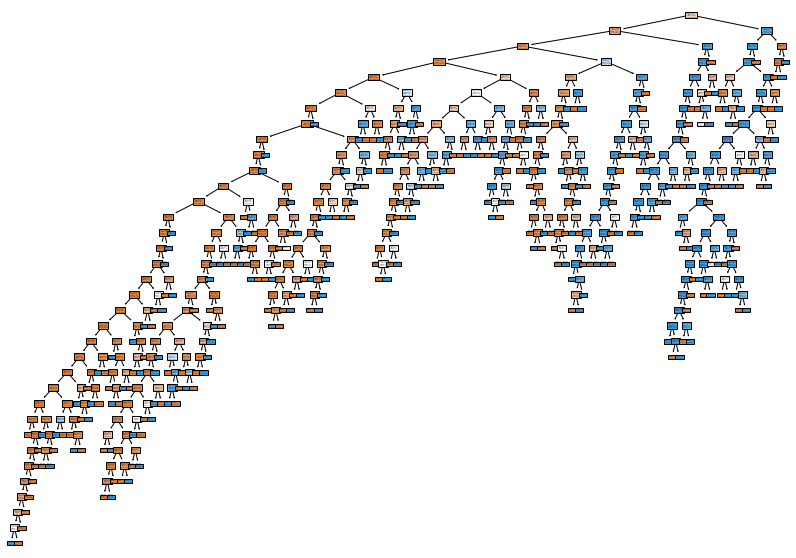

In [6]:
oak = tree.DecisionTreeClassifier(random_state=29)
oak = oak.fit(ndata, y)

plt.figure(figsize=(14,10))
tree.plot_tree(oak, filled=True)
plt.show()

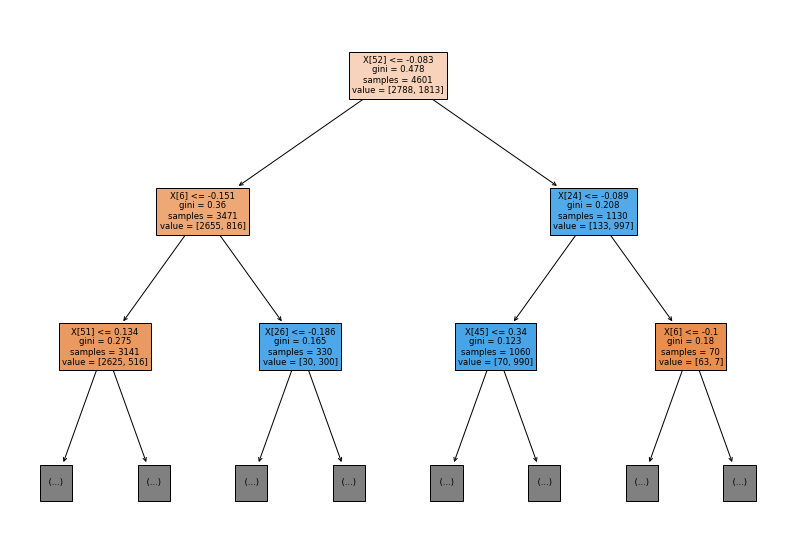

In [7]:
plt.figure(figsize=(14,10))
tree.plot_tree(oak, filled=True, max_depth=2)
plt.show()

In [8]:
# Part 3
X_train, X_test, y_train, y_test = train_test_split(ndata, y, test_size=0.2)
print(round(len(X_train)/(len(ndata)),2))

0.8


In [9]:
depths = list(range(1,41,1))
oak_auc = []
rf_auc = []
for i in range(len(depths)):
    oak = tree.DecisionTreeClassifier(max_depth=depths[i], random_state=29)
    oak = oak.fit(X_train,y_train)
    oak_pred = oak.predict(X_test)
    oak_probs = oak.predict_proba(X_test)[:, 1]
    oak_auc.append(round(roc_auc_score(y_test, oak_probs)*100,2))     
    rf = RandomForestClassifier(max_depth=depths[i], random_state=29)
    rf.fit(X_train,y_train)
    rf_pred = rf.predict(X_test)
    rf_probs = rf.predict_proba(X_test)[:, 1]
    rf_auc.append(round(roc_auc_score(y_test, rf_probs)*100,2))      

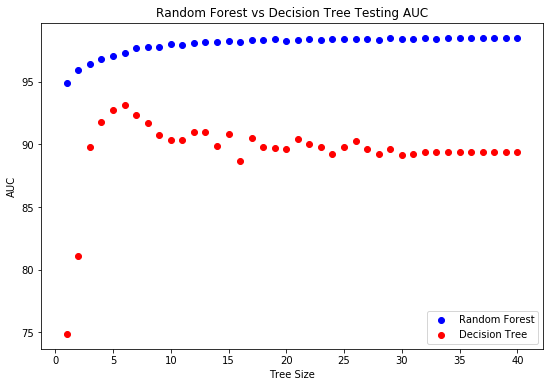

In [10]:
plt.figure(figsize=(9,6))
plt.scatter(depths,rf_auc,c='b',label='Random Forest')
plt.scatter(depths,oak_auc,c='r',label='Decision Tree')
plt.xlabel("Tree Size")
plt.ylabel("AUC")
plt.title('Random Forest vs Decision Tree Testing AUC')
plt.legend(loc='lower right')
plt.show()